_Lambda School Data Science_

# Make explanatory visualizations




Tody we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [1]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Objectives
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

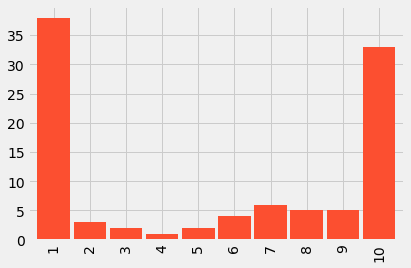

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

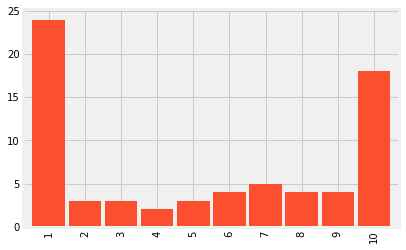

In [4]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

In [5]:
display(example)

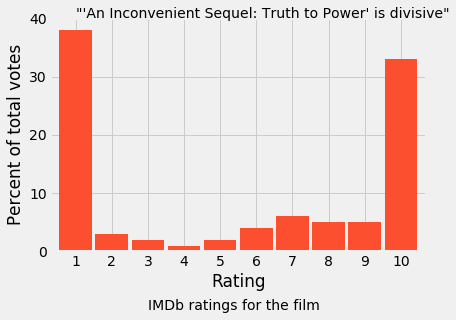

In [16]:
plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

ax = fake.plot.bar(color='C1', width=0.9);
ax.tick_params(labelrotation=0)
ax.text(x=0,y=40,s='"\'An Inconvenient Sequel: Truth to Power\' is divisive"')
ax.text(x=2,y=-10,s='IMDb ratings for the film')
ax.set(xlabel='Rating',
       ylabel='Percent of total votes',
       yticks=range(0,50,10));

## Annotate with text

## Reproduce with real data

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [19]:
df.shape

(80053, 27)

In [21]:
width,height = df.shape
width*height

2161431

In [23]:
pd.options.display.max_columns=500
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [25]:
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-08-19 06:00:06.006685
freq                               1
Name: timestamp, dtype: object

In [26]:
df.timestamp = pd.to_datetime(df.timestamp)

In [27]:
df = df.set_index('timestamp')

In [28]:
df['2017-08-29']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-29 00:00:03.441529,450,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.4,6.6,8,117,3,6,7,17,24,35,28,23,190,26.0,0.7,1.3,1.6,3.8,5.3,7.8,6.2,5.1,42.2
2017-08-29 00:00:03.636825,402,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.3,6.5,8,112,3,4,6,15,20,33,25,21,163,27.9,0.7,1.0,1.5,3.7,5.0,8.2,6.2,5.2,40.5
2017-08-29 00:00:03.839446,41,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.1,7.9,10,4,0,2,1,2,2,2,3,2,23,9.8,0.0,4.9,2.4,4.9,4.9,4.9,7.3,4.9,56.1
2017-08-29 00:00:04.030663,771,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,5.6,5.6,7,287,21,12,4,21,36,53,38,49,250,37.2,2.7,1.6,0.5,2.7,4.7,6.9,4.9,6.4,32.4


In [29]:
df.category.value_counts()

Males under 18        4216
US users              4216
Aged 18-29            4216
Aged under 18         4216
Females Aged 18-29    4216
Males Aged 18-29      4216
Males Aged 30-44      4216
Females Aged 30-44    4216
Non-US users          4216
IMDb users            4216
Aged 30-44            4216
Top 1000 voters       4216
Aged 45+              4216
Females               4216
IMDb staff            4216
Females Aged 45+      4216
Males                 4216
Males Aged 45+        4216
Females under 18      4165
Name: category, dtype: int64

In [30]:
df[df.category=='IMDb users']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:36.697246,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 12:34:21.250099,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 13:00:06.506688,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 14:00:06.727742,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 15:00:06.055125,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 16:00:06.023053,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 17:00:06.142993,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 18:00:06.510891,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6
2017-07-17 19:00:06.666467,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6


In [31]:
lastday = df['2017-08-29']

In [33]:
lastday[lastday.category=='IMDb users']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:06.288486,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:10:06.763461,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:20:05.745307,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:30:05.818552,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:40:06.180928,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:50:05.826082,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 01:00:05.483262,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 01:10:06.038644,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 01:20:05.807155,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7


In [34]:
lastday[lastday.category=='IMDb users']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:06.288486,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:10:06.763461,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:20:05.745307,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:30:05.818552,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:40:06.180928,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:50:05.826082,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 01:00:05.483262,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 01:10:06.038644,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 01:20:05.807155,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7


In [35]:
final = df.tail(1)

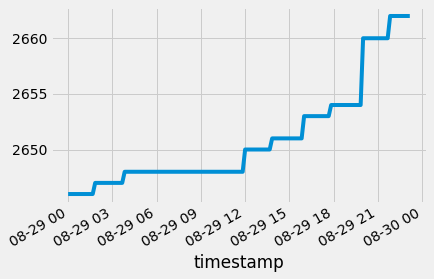

In [37]:
lastday[lastday.category=='IMDb users'].respondents.plot();

In [38]:
cols = [str(i) + '_pct' for i in range(1,11)]
final[cols]

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [39]:
data=final[cols].T

In [40]:
data.index=range(1,11)

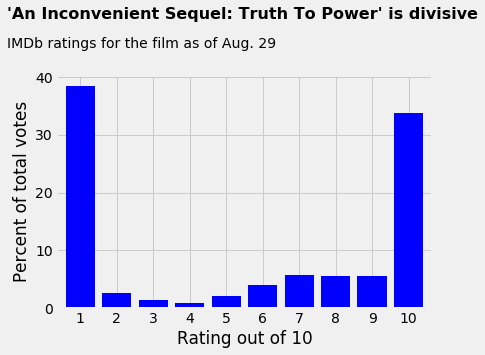

In [44]:
plt.style.use('fivethirtyeight')
ax=data.plot.bar(color='B',width=0.8,legend=False)
ax.tick_params(labelrotation=0)
ax.text(x=-2, y=50, s="'An Inconvenient Sequel: Truth To Power' is divisive", 
        fontsize=16, fontweight='bold')

ax.text(x=-2, y=45, s='IMDb ratings for the film as of Aug. 29')

ax.set(xlabel='Rating out of 10', 
       ylabel='Percent of total votes', 
       yticks=range(0,50,10));

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### Make more charts!

Choose a chart you want to make, from [FT's Visual Vocabulary poster](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!









In [59]:
fcc = pd.read_csv('https://raw.githubusercontent.com/freeCodeCamp/open-data/master/facebook-fCC-data/data/freeCodeCamp-facebook-page-activity.csv')

fcc.head()

,date,time,title,type,reach,clicks,reactions
0,08/18/2017,3:45 pm,The origins of t-distributions and how they ca...,Link,1768,44,21
1,08/18/2017,11:27 am,How one camper got his developer dream job,Link,6941,536,99
2,08/17/2017,7:18 pm,Trying to code when chat's open,Video,17399,2236,750
3,08/17/2017,4:55 pm,"An interaction designer explains how a ""homele...",Link,3751,167,10
4,08/17/2017,7:56 am,How to build a neural network in 30 lines of J...,Link,18248,1946,474


### Stretching

For this stretch goal i'm going to look at a dataset from 'freeCodeCamp' and look for trends within their Facebook analytics.


In [60]:
fcc.dtypes

date         object
time         object
title        object
type         object
reach         int64
clicks        int64
reactions    object
dtype: object

In [62]:
fcc.type.value_counts()

Link      305
Photo      88
Video      23
Status      3
Public      1
Name: type, dtype: int64

In [63]:
fcc.title.value_counts()

Freecodecamp shared your post.                                                                                                                                                                                                       12
Timeline Photos                                                                                                                                                                                                                       8
So true it hurts.                                                                                                                                                                                                                     2
If you're trying to help get your significant other into coding here's how Carl did it.                                                                                                                                               1
Congratulations to camper and Seoul study group leader Sonya Moisset on 

In [73]:
fcc_copy = fcc.copy()

In [74]:
fcc_copy = fcc_copy.set_index('type')

In [76]:
fcc_copy.head()

,date,time,title,reach,clicks,reactions
type,,,,,,
Link,08/18/2017,3:45 pm,The origins of t-distributions and how they ca...,1768,44,21
Link,08/18/2017,11:27 am,How one camper got his developer dream job,6941,536,99
Video,08/17/2017,7:18 pm,Trying to code when chat's open,17399,2236,750
Link,08/17/2017,4:55 pm,"An interaction designer explains how a ""homele...",3751,167,10
Link,08/17/2017,7:56 am,How to build a neural network in 30 lines of J...,18248,1946,474


In [79]:
fcc_copy['clicks_by_reach'] = fcc_copy['reach']/fcc_copy['clicks']

In [81]:
fcc_copy.head()
#clicks_by_reach represents the amount of reaches needed to
#generate one click

,date,time,title,reach,clicks,reactions,clicks_by_reach
type,,,,,,,
Link,08/18/2017,3:45 pm,The origins of t-distributions and how they ca...,1768,44,21,40.181818
Link,08/18/2017,11:27 am,How one camper got his developer dream job,6941,536,99,12.949627
Video,08/17/2017,7:18 pm,Trying to code when chat's open,17399,2236,750,7.781306
Link,08/17/2017,4:55 pm,"An interaction designer explains how a ""homele...",3751,167,10,22.461078
Link,08/17/2017,7:56 am,How to build a neural network in 30 lines of J...,18248,1946,474,9.377184


In [90]:
plt.style.use('fivethirtyeight')

In [91]:
fcc.head()

,date,time,title,type,reach,clicks,reactions
0,08/18/2017,3:45 pm,The origins of t-distributions and how they ca...,Link,1768,44,21
1,08/18/2017,11:27 am,How one camper got his developer dream job,Link,6941,536,99
2,08/17/2017,7:18 pm,Trying to code when chat's open,Video,17399,2236,750
3,08/17/2017,4:55 pm,"An interaction designer explains how a ""homele...",Link,3751,167,10
4,08/17/2017,7:56 am,How to build a neural network in 30 lines of J...,Link,18248,1946,474


In [104]:
# as a percentage point
fcc['clicks_by_reach'] = fcc['clicks']/fcc['reach']
len(fcc['clicks_by_reach'])

420

In [105]:
fcc['clicks_by_reach']

0      0.024887
1      0.077222
2      0.128513
3      0.044521
4      0.106642
5      0.041615
6      0.049028
7      0.080476
8      0.086355
9      0.071145
10     0.056137
11     0.040499
12     0.048957
13     0.159180
14     0.074375
15     0.052065
16     0.085000
17     0.033187
18     0.064978
19     0.126295
20     0.149910
21     0.059972
22     0.080238
23     0.075492
24     0.077233
25     0.074428
26     0.020984
27     0.070461
28     0.074095
29     0.063682
         ...   
390    0.120851
391    0.054201
392    0.257024
393    0.072821
394    0.105644
395    0.094907
396    0.197509
397    0.092152
398    0.101264
399    0.114968
400    0.170036
401    0.052764
402    0.188809
403    0.221716
404    0.366086
405    0.119371
406    0.026254
407    0.187079
408    0.071638
409    0.196604
410    0.069450
411    0.124523
412    0.081420
413    0.078973
414    0.088646
415    0.505993
416    0.228879
417    0.481681
418    0.063912
419    0.155893
Name: clicks_by_reach, L

In [108]:
types = fcc.groupby(by=['type'])

In [110]:
fcc.loc[fcc.clicks_by_reach> 0.1, ['type', 'clicks_by_reach']]

,type,clicks_by_reach
2,Video,0.128513
4,Link,0.106642
13,Photo,0.159180
19,Photo,0.126295
20,Photo,0.149910
33,Link,0.183122
69,Link,0.104804
72,Photo,0.124519
74,Link,0.102618
79,Photo,0.115694
